# Predicting from Sound
> A Neural Networks project by Aleksander Nikolajev, Kayahan Kaya and Severin Brunner

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- sticky_rank: 1

## Introduction
Gaining information from sounds is a fundamental human ability: We can detect and identify objects just from our hearing as well as estimate the direction and distance of that object. 
Writing software with the same abilities is a difficult task due to the enormous complexity of audio signals. Applying machine learning, in particular neural networks, is the most promising approach to meet this challenge. 
In this project we are researching common methods to deploy neural networks for prediction from sound and are creating our own neural network that is able to extract certain information from audio samples. In particular, we are trying to predict the source of a sound as well as the distance between source and microphone.


## Audio theory
In this section, essential theoretical elements of audio analysis are introduced.

### Pulse-code modulation (PCM)
In order to store an analog audio signal in memory, it has to be digitized by applying sampling and quantization. Sampling refers to measuring the signal values at specific timesteps, which transforms the original time-continuous signal into a time-discrete one. Quantization implies mapping the continuous signal values to discrete values in a specific range, e.g. 16 bits.

![](https://upload.wikimedia.org/wikipedia/commons/b/bf/Pcm.svg "Sampling and quantization of an analog signal (red) with 4-bit PCM, resulting in a time-discrete and value-discrete signal (blue).")

PCM is a format for storing uncompressed audio signals. It simply contains an array of values that have been produced by sampling and quantizing an analog signal. It has two basic properties:  The sampling rate (how many samples per second were taken) and the bit depth (the number of bits per sample value), which determines the resolution. A typical sampling rate is 44.1 kHz (e.g. CDs), and 16 bits is a common choice for the bit depth.



### Spectograms

A spectrogram is a visualiziaton of the frequency spectrum of a signal over time. The frequency spectrum represents the signal strength of the various frequencies present in the signal. It can be calculated by applying a fourier transform to the signal.
The spectogram is depicted as a heat map, which means the intensity at a specific frequency and time is expressed through the color.
![](clarinette_spectogram.png "Spectrogram of a recording of a clarinet playing a note. The bottom line is at the frequency of the keynote, the higher lines are the harmonics. The clarinet starts playing at 0.4 seconds")

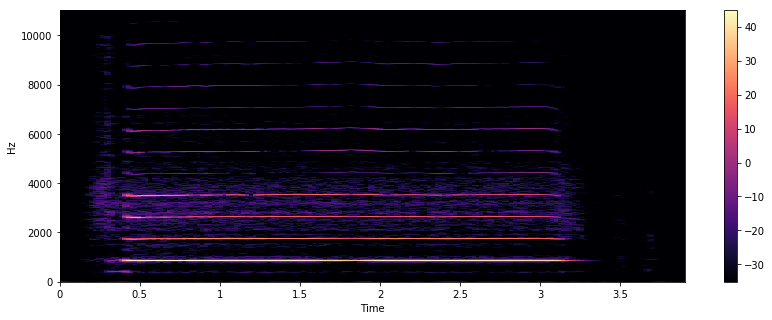

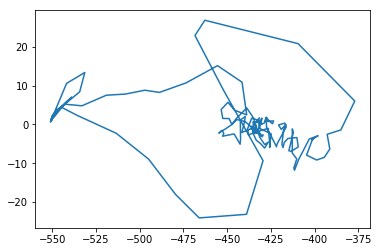

In [40]:
#Hide
# apply fourier transform
X = librosa.stft(audio)
# transform intensity to dezibel scale
Xdb = librosa.amplitude_to_db(abs(X))
# show as heatmap
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate)
mfccs.shape
plt.plot(mfccs[0], mfccs[1])


TODO: Features to extract from an audio signal
spectral features (frequency-based), e.g. spectral centroid, spectral density ...

### MFCC (Mel-Frequency Cepstral Coefficients)
For audio analysis, it often makes sense to extract certain features from the raw audio signal, like the signal energy or the spectogram. As a feature, the MFC coefficients represent the entire frequency spectrum compactly with few values (e.g. 40), which approximates the human auditory system more closely. This has proven useful for applications like speech or song recognition.

## Creating the dataset
Aleksander

#Hide
## The Dataset

As a dataset for testing and training, we are using the one provided for the 2018 Kaggle Freesound competition, which is downloadable [here](https://www.kaggle.com/c/freesound-audio-tagging/data).
It contains sounds from 41 different categories such as trumpet or fireworks, with 9473 training examples and 1600 test examples. However the samples aren't distributed uniformly over the categories, meaning there's more data for some categories than for others. Also, the amount of manually verified samples varies from category to category.  This might cause the training to become more challenging.

![](kaggle_dataset_distribution.png "The dataset. As it can be seen, only a part of the samples has been manually verified (blue). The amount of samples and the fraction of manually verified samples per category varies between the categories.")

## Creating the network

We are using Keras as the deep learning library to construct our network.



### Network input

A major design decision is in which format the input audio signal will be fed to the network. 
Theoretically, raw array is possible

Creating a spectogram and feeding it as image

Using MFCC

Librosa is a python library to analyse audio signals. It provides several functions to extract features from audio data, which we will be using to preprocess the network input.

#hide 
TODO: Explain the different approaches to network input, architectures etc.

At this point we must decide in which format we will provide the network input. The dataset samples are given as raw audio data files, which could be directly used as input. However this has several disadvantages, one of them being the extensive memory usage. Loading the entire dataset into memory might exceed our capacities. A so-called data generator can provide relief. It loads the samples one by one in real-time during training and testing instead of using the naive approach of loading all samples at once. The code for such a data generator can be found at https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly. 

Still, computations on large data are more time-consuming, especially when they are loaded into memory on-the-fly like it is the case for a data generator. A better idea might be to extract features from the raw audio files and use these as input. This essentially compresses the input, which makes the use of a data generator unnecessary and greatly accelerates the training process.  

Therefore as a processing step, we are extracting so-called MFCC audio features from our input data using the Librosa library. The MFCC data are created one by one for each sample and stored in a variable X. This process is quite time-consuming. After it is done, we finally normalize the generated input data.

Now, we build our network model. 
The model starts with a convolutional layer followed by ReLU activation and a maxpool layer. Batch normalization is applied by inserting the corresponding layer before the activation function. 
This structure is repeated 3 more times, then the model ends with a fully connected layer of size 64 with batch normalization. The final output is given by a softmax layer which produces a probability distribution over the 41 classes.

As a loss function, we use cross entropy, and the Adam optimizer is used for training.

To prepare the output, we are converting the raw labels to integer indices and are setting the filename as the index for the train and test data:

## Results and Conclusion
Training for 30 epochs results in a promising training accuracy of around 90%. However the network currently shows strong overfitting, as the accuracy on the validation set barely reaches 40%. 
Further investigation is needed in order to find ways to reduce this massive gap. 

Future work includes exploring other ways to obtain information from sounds, for example predicting the distance from a sound source given a sound sample.

### Source code
[include link here]()

## References

{{ 'https://www.kaggle.com/fizzbuzz/beginner-s-guide-to-audio-data/' | fndetail: 1}}